In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('penguins_size.csv')
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [12]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=101, max_features="sqrt")

In [23]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [24]:
y_pred = rf_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [29]:
test_error = []

for n in range(1,40):
    modrf = RandomForestClassifier(n_estimators=n)
    modrf.fit(X_train,y_train)
    test_preds = modrf.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

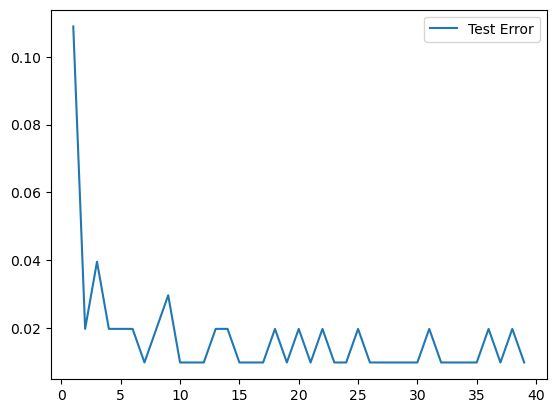

In [31]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()
plt.show()